# CSE4/587 DATA-INTENSIVE COMPUTING SPRING 2018

# DATA COLLECTION AND EXPLORATORY DATA ANALYSIS
---------------Meghana Vasudeva---------University at Buffalo---------------CSE587------------------------------------------

# The lab goals will be accomplished through these specific objectives:
1. Educate ourselves about influenza or flu that is rampant this season in the USA. In general, be cognizant of what is going on in world around you.
2. Familiarize ourselves with R language through Jupyter environment.
4. Exploring the real flu data, and conducting analysis performed by experts in Center for Disease Control (CDC) and related organizations.
5. Collected data by querying Twitter REST API. 
6. Processed data using twitteR library package of R.
7. Visualized geo spatial information extracted from the tweets using geo-map libraries of R: ggplot2, ggmap, maps,and maptools.
8. Compared CDC flu map with your own home-brewed flu map of the USA derived from the twitter data you obtained

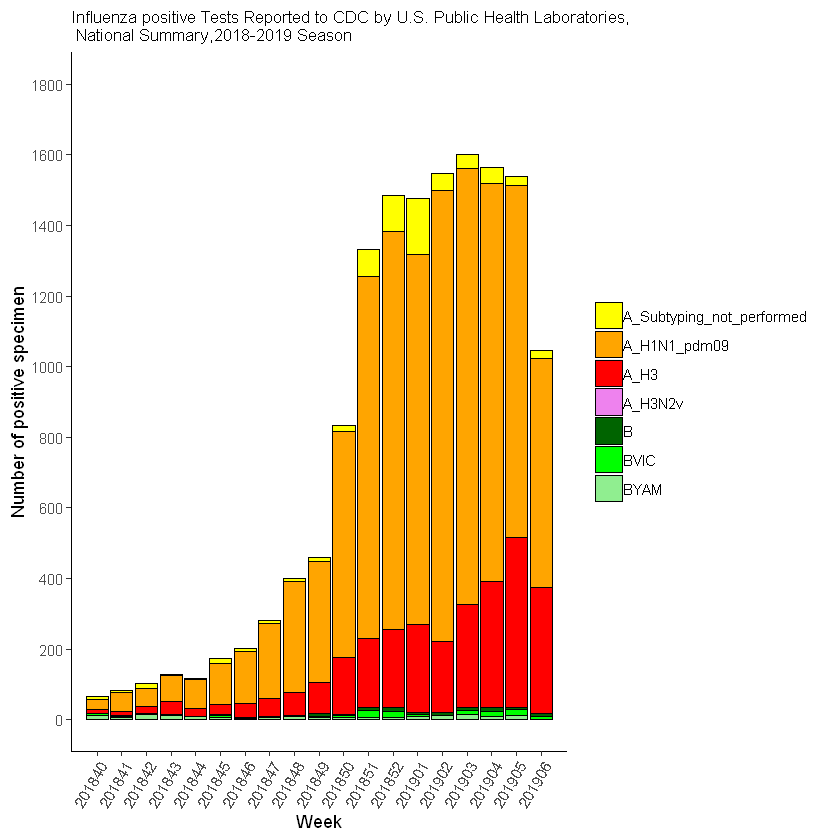

In [39]:
flu <- read.csv(file.choose()) #reading the file 
flu$WeekData<-as.numeric(as.character(flu$Week))
flu$WeekData <- seq.int(nrow(flu)) #generating integer sequence of the data
variables <-flu[,c('A_Subtyping_not_performed','A_H1N1_pdm09','A_H3','A_H3N2v','B','BVIC','BYAM','WeekData')] #storing the data for x axis in a single variable
require(reshape)
variables2 <- melt(variables, id.var='WeekData') #The melt function takes data in wide format and stacks a set of columns into a single column of data.The values are seperated wrt to week data
library(ggthemes) #provides ggplot2 themes
library(ggplot2)  #library used for plotting the graphs
ggplot(variables2, aes(x = WeekData, y = value,fill=variable)) +  #For this plot we are using weekdata on x axis and values stored in variables for y axis.
  geom_bar(stat = "identity",color="black")+
  scale_x_discrete(limit = flu$WeekData,labels=c("1" = "201840","2" = "201841","3" = "201842",
                                                  "4"="201843","5"="201844","6"="201845",
                                                  "7"="201846", "8"="201847","9" ="201848", "10" ="201849",
                                                  "11"="201850", "12"="201851","13"="201852",
                                                  "14"="201901", "15"="201902","16"="201903",
                                                  "17"="201904", "18"="201905","19"="201906"))+
  scale_fill_manual(values = c("yellow","orange","red","violet","darkgreen","green","lightgreen"),aesthetics = "fill")+                     
  theme(axis.text.x = element_text(angle = 60, hjust = 1))+
  theme(legend.title=element_blank(),panel.background = element_blank(),axis.line = element_line(colour = "black"))+
  xlab("Week")+
  ylab("Number of positive specimen")+
  coord_cartesian(ylim=c(0,1800))+
  scale_y_continuous(breaks=seq(0,1800,200))+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Public Health Laboratories, \n National Summary,2018-2019 Season")+
  theme(plot.title = element_text(size=10))  #specifying the colors using scale_fill_manual, specifying x-axis label and y-axis label, title, theme for the graph and adjusting scale for ggplot. 

Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.5.2"Warning message:
"package 'ggthemes' was built under R version 3.5.2"Warning message:
"package 'ggplot2' was built under R version 3.5.2"

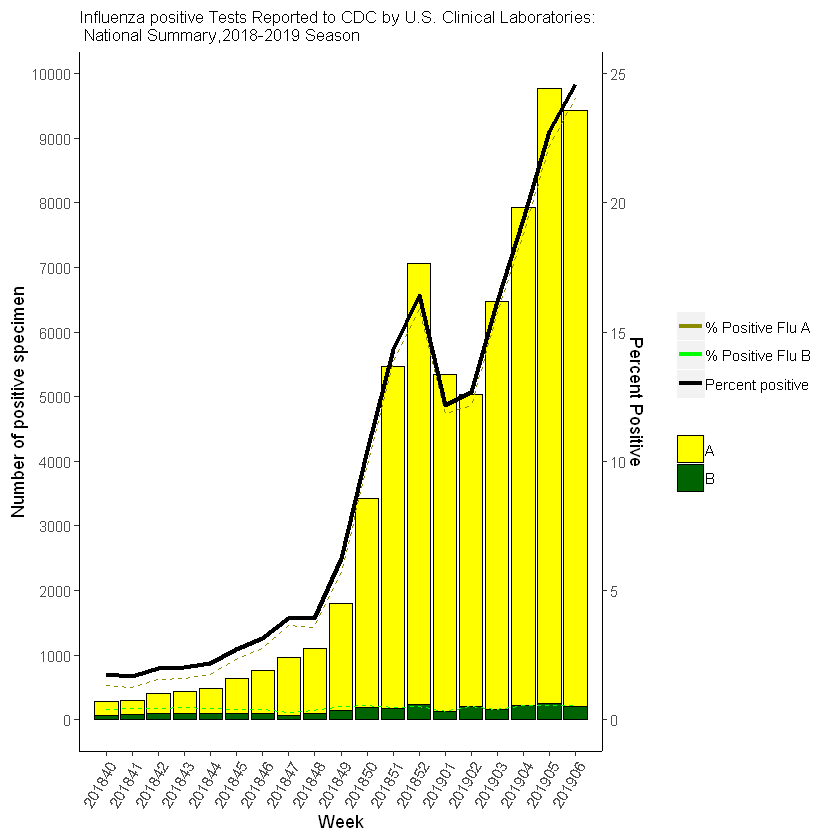

In [12]:
flu2 <- read.csv(file.choose())  #reading the file
flu2$WeekData<-as.numeric(as.character(flu2$Week))
flu2$WeekData <- seq.int(nrow(flu2))  #generating integer sequence of the data
variables <-flu2[,c('A','B','WeekData')]
require(reshape)

variables2 <- melt(variables, id.var='WeekData')  #storing the data for x axis in different variables
variables3 <-flu2[,c('Percent_Positive_A','WeekData')]
variables4 <- melt(variables3, id.var='WeekData')
variables5 <-flu2[,c('Percent_Positive_B','WeekData')]
variables6 <- melt(variables5, id.var='WeekData')
variables7 <-flu2[,c('X._.Positive','WeekData')]
variables8 <- melt(variables7, id.var='WeekData')

# Install 
library(ggthemes)  #provides ggplot2 themes
library(ggplot2)   #library used for plotting the graphs
ggplot()+
  geom_bar(stat="identity",colour="black",data=variables2, aes(x = WeekData, y = value, fill=variable))+  #plotting bar graph with weekdata on x axis and the values stored in value on y axis
  scale_fill_manual(values = c("yellow","darkgreen","pink","red","purple"),aesthetics = "fill","color")+  #using scale_fill_manual to plot graphs into different colors
 
   geom_line(data = variables4, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+  #plotting line graph
  geom_line(data = variables6, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables8, aes(x=WeekData, y = value/0.0025,color = variable),linetype="solid",size=1.25)+
  
  scale_color_manual(name="a",values =c("yellow4","green","black"),labels=c("% Positive Flu A","% Positive Flu B","Percent positive"),aesthetics = "color")+

  scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive"),breaks=seq(0,10000,1000))+
  scale_x_discrete(limit = flu2$WeekData,labels=c("1" = "201840","2" = "201841","3" = "201842",
                                                 "4"="201843","5"="201844","6"="201845",
                                                 "7"="201846", "8"="201847","9" ="201848", "10" ="201849",
                                                 "11"="201850", "12"="201851","13"="201852",
                                                 "14"="201901", "15"="201902","16"="201903",
                                                 "17"="201904", "18"="201905","19"="201906"))+
  
  theme(axis.text.x = element_text(angle = 60, hjust = 1),panel.background = element_blank(),axis.line = element_line(colour = "black"),legend.title=element_blank())+
  xlab("Week")+
  ylab("Number of positive specimen")+   #setting x and y axis labels
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Clinical Laboratories: \n National Summary,2018-2019 Season")+  #setting the graph title
  
  theme(plot.title = element_text(size=10))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


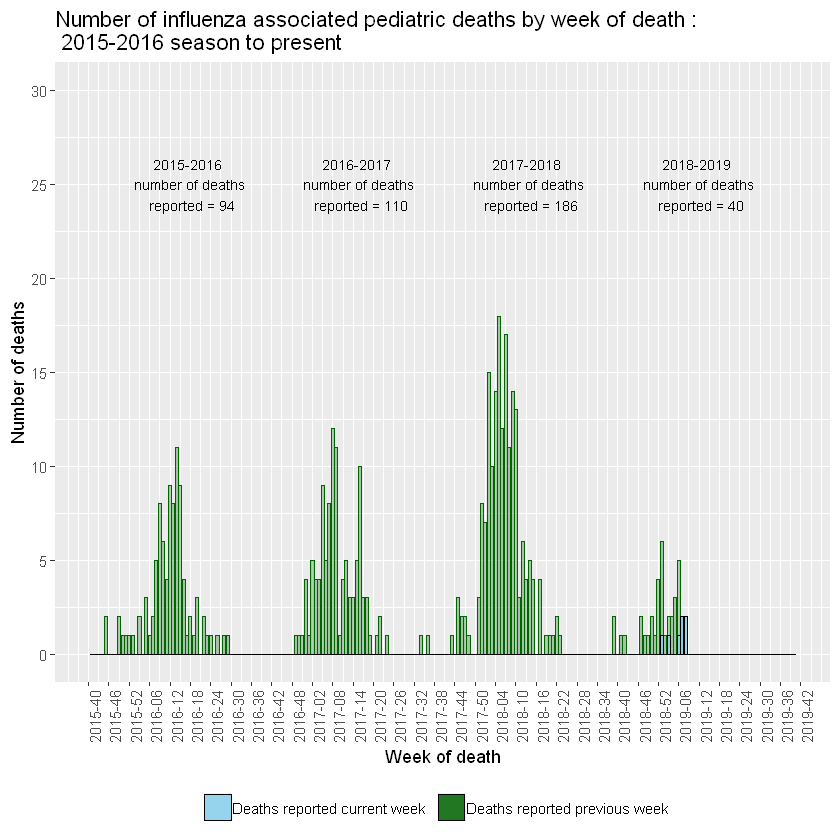

In [13]:
 mortality<-read.csv(file.choose())   #reading the file

mortality$WEEK_NUMBER <- seq.int(nrow(mortality))  #generating integer sequence of the data

total1 <-paste("2015-2016","\n number of deaths \n reported =",sum(mortality$NO_OF_DEATHS[1:53]))  #Calculating number of deaths per year

total2 <-paste("2016-2017","\n number of deaths \n reported =",sum(mortality$NO_OF_DEATHS[54:105]))

total3 <-paste("2017-2018","\n number of deaths \n reported =",sum(mortality$NO_OF_DEATHS[106:157]))

total4<-paste("2018-2019","\n number of deaths \n reported =",sum(mortality$NO_OF_DEATHS[158:208]))


library(ggplot2)  #importing library ggplot2 to plot the graph  
ggplot(data=mortality,aes(x=WEEK_NUMBER))+  #plotting week number on x axis
  geom_bar(aes(y=PREVIOUS_WEEK_DEATHS,fill='Deaths reported previous week'),stat="identity",position ="identity",alpha=.3,color="darkgreen") +    #plotting bar graph with previous week's deaths on y axis
  geom_bar(aes(y=CURRENT_WEEK_DEATHS,fill='Deaths reported current week'),stat="identity",position ="identity",alpha=.8,color="black")+    #plotting bar graph with current week's deaths on y axis
  scale_fill_manual(values=c("skyblue","darkgreen"),aesthetics = "fill")+
  scale_fill_manual(values=c("skyblue","darkgreen"),aesthetics = "fill")+
  xlab("Week of death") +    #labelling x axis
  ylab("Number of deaths")+  #labelling y axis
  ggtitle("Number of influenza associated pediatric deaths by week of death :\n 2015-2016 season to present")+  #title of the main graph
  theme(legend.title=element_blank(),legend.position="bottom",axis.text.x = element_text(angle = 90, hjust = 1))+
  coord_cartesian(ylim = c(00, 30))+
  scale_y_continuous(breaks=seq(0,30,05))+
  scale_x_continuous(breaks =seq(0,210,6),labels=c("0"	=	"2015-40",
                                                   "6"	=	"2015-46",
                                                   "12"	=	"2015-52",
                                                   "18"	=	"2016-06",
                                                   "24"	=	"2016-12",
                                                   "30"	=	"2016-18",
                                                   "36"	=	"2016-24",
                                                   "42"	=	"2016-30",
                                                   "48"	=	"2016-36",
                                                   "54"	=	"2016-42",
                                                   "60"	=	"2016-48",
                                                   "66"	=	"2017-02",
                                                   "72"	=	"2017-08",
                                                   "78"	=	"2017-14",
                                                   "84"	=	"2017-20",
                                                   "90"	=	"2017-26",
                                                   "96"	=	"2017-32",
                                                   "102" = "2017-38",
                                                   "108"	=	"2017-44",
                                                   "114"	=	"2017-50",
                                                   "120"	=	"2018-04",
                                                   "126"	=	"2018-10",
                                                   "132"	=	"2018-16",
                                                   "138"	=	"2018-22",
                                                   "144"	=	"2018-28",
                                                   "150"	=	"2018-34",
                                                   "156"	=	"2018-40",
                                                   "162"	=	"2018-46",
                                                   "168"	=	"2018-52",
                                                   "174"	=	"2019-06",
                                                   "180"	=	"2019-12",
                                                   "186"	=	"2019-18",
                                                   "192"	=	"2019-24",
                                                   "198"	=	"2019-30",
                                                   "204"	=	"2019-36",
                                                   "210"	=	"2019-42"
                                        
                                                  ))+
  
  annotate("text", label = total1, x = 30, y = 25, color = "black",size = 3)+
  annotate("text", label = total2, x = 80, y = 25, color = "black",size = 3)+
  annotate("text", label = total3, x = 130, y = 25, color = "black",size = 3)+
  annotate("text", label = total4, x = 180, y = 25, color = "black",size = 3)                 

In [1]:
flu2<-read.csv(file.choose())

In [2]:
#This is for the big pie chart
Positive_Speciman<-subset(flu2, flu2$Total_Number != 0)#subflu2
TotalPositive<-Positive_Speciman$Total_Number
lbls<-Positive_Speciman$X.Sub.type
pie(TotalPositive,labels = x,col=heat.colors(6),main = "Influenza positive specimen Reported by \n US Public Health Laboratories,Cumulative 2018-2019 season",clockwise=FALSE)
legend("bottomleft",legend = paste("Influenza",Positive_Speciman$X.Sub.type), fill=heat.colors(10), bty="n",cex=0.6)


ERROR: Error in pie(TotalPositive, labels = x, col = heat.colors(6), main = "Influenza positive specimen Reported by \n US Public Health Laboratories,Cumulative 2018-2019 season", : object 'x' not found


In [11]:
par(mfrow=c(2,2)) 

Influenza_H3N2<-subset(flu2, flu2$X.Sub.type == 'Influenza A(H3N2)')
percentage_2<-as.numeric(gsub("[^0-9]", "", Influenza_H3N2$X..of..Sub.type.Total))
variable_2<-Influenza_H3N2$Genetic_Group
pie(percentage_2,labels = paste(Influenza_H3N2$Genetic_Group,Influenza_H3N2$X..of..Sub.type.Total),col=rainbow(length(variable_2)),main = "Influenza A(H3N2)",clockwise=TRUE)
legend("bottomright", legend = H3N2$Genetic_Group, fill=rainbow(length(variable_2)), bty="n",cex=0.7)



influenza_pdm<-subset(flu2, flu2$X.Sub.type == 'Influenza A(H1N1) pdm09')
percentage_3<-as.numeric(gsub("[^0-9]", "", influenza_pdm$X..of..Sub.type.Total))
variable_3<-influenza_pdm$Genetic_Group
pie(percentage_3,labels = paste(influenza_pdm$Genetic_Group,influenza_pdm$X..of..Sub.type.Total),col=rainbow(length(variable_3)),main = "Influenza A(H1N1) pdm09",clockwise=TRUE)
#legend("bottomright", legend = pdm$Genetic_Group, fill=rainbow(length(lbls5)), bty="n",cex=0.7)



Influenza_BVict<-subset(flu2, flu2$X.Sub.type == 'Influenza B Victoria')
percentage_4<-as.numeric(gsub("[^0-9]", "", Influenza_BVict$X..of..Sub.type.Total))
variable_4<-Influenza_BVict$Genetic_Group
pie(percentage_4,labels = paste(Influenza_BVict$Genetic_Group,Influenza_BVict$X..of..Sub.type.Total),col=rainbow(length(variable_4)),main = "Influenza B Victoria",clockwise=TRUE)
#legend("bottomright", legend = BVict$Genetic_Group, fill=rainbow(length(lbls1)), bty="n",cex=0.6)



influenza_B_yamagata<-subset(flu2, flu2$X.Sub.type == 'Influenza B Yamagata')
percentage_5<-as.numeric(gsub("[^0-9]", "", influenza_B_yamagata$X..of..Sub.type.Total))
variable_5<-influenza_B_yamagata$Genetic_Group
pie(percentage_5,labels = paste(influenza_B_yamagata$Genetic_Group,influenza_B_yamagata$X..of..Sub.type.Total),col=rainbow(length(variable_5)),main = "Influenza B Yamagata",clockwise=TRUE)
#legend("bottomright", legend = BVict$Genetic_Group, fill=rainbow(length(lbls1)), bty="n",cex=0.6)



ERROR: Error in as.graphicsAnnot(legend): object 'H3N2' not found


# PART 2:  Problem 1 - Influenza National Summary (Plot for 52 weeks data)

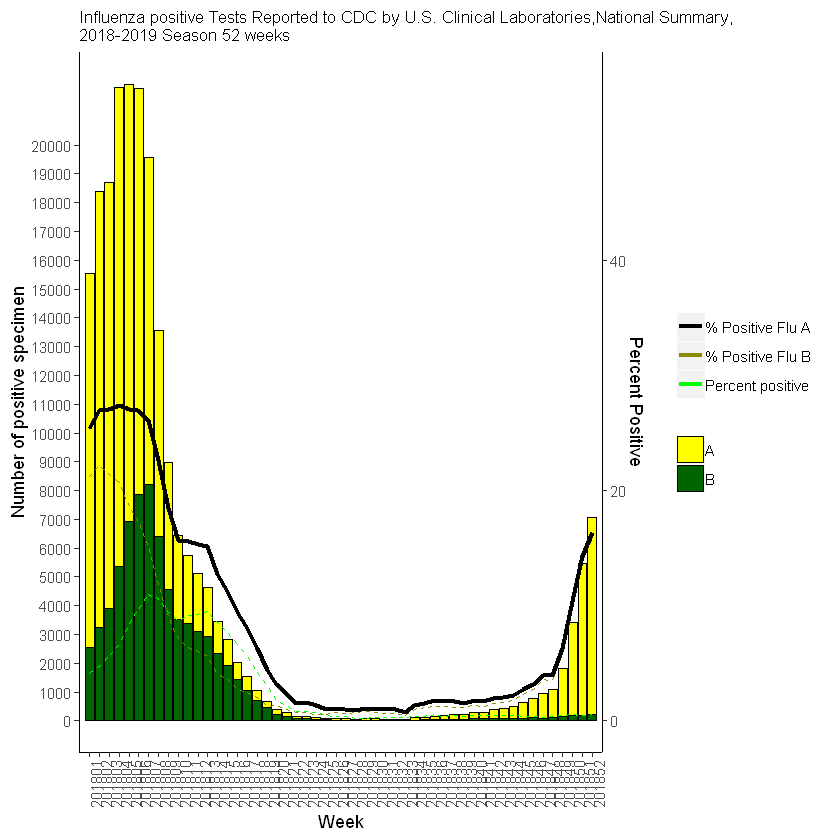

In [37]:
# The influenza national summary graph (Part2: Problem 1) is plotted again for a different data now. 
#The data is retrieved for the entire 2018 i.e. for 52 weeks and the graph is plotted again.

flu2week52 <- read.csv(file.choose())

flu2week52$WeekData<-as.numeric(as.character(flu2week52$Week))

flu2week52$WeekData <- seq.int(nrow(flu2week52))


variables <-flu2week52[,c('A','B','WeekData')]


require(reshape)

variables2 <- melt(variables, id.var='WeekData')

variables3 <-flu2week52[,c('Percent_Positive_A','WeekData')]
variables4 <- melt(variables3, id.var='WeekData')


variables5 <-flu2week52[,c('Percent_Positive_B','WeekData')]
variables6 <- melt(variables5, id.var='WeekData')


variables7 <-flu2week52[,c('PERCENT_POSITIVE','WeekData')]
variables8 <- melt(variables7, id.var='WeekData')



# Install 
library(ggthemes)
library(ggplot2)
ggplot()+
  geom_bar(stat="identity",colour="black",data=variables2, aes(x = WeekData, y = value, fill=variable))+
  scale_fill_manual(values = c("yellow","darkgreen"),aesthetics = "fill")+
  
  geom_line(data = variables4, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables6, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables8, aes(x=WeekData, y = value/0.0025,color = variable),linetype="solid",size=1.25)+
  
  scale_color_manual(name="a",values =c("black","yellow4","green"),labels=c("% Positive Flu A","% Positive Flu B","Percent positive"),aesthetics = "color")+
  
  scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive"),breaks=seq(0,20000,1000))+
  scale_x_discrete(limit = flu2week52$WeekData,labels=c("1" = "201801","2" = "201802","3" = "201803",
                                                        "4"="201804","5"="201805","6"="201806",
                                                        "7"="201807", "8"="201808","9" ="201809", "10" ="201810",
                                                        "11"="201811", "12"="201812","13"="201813",
                                                        "14"="201814", "15"="201815","16"="201816",
                                                        "17"="201817", "18"="201818","19"="201819","20"="201820","21"="201821",
                                                        "22"=	"201822",
                                                        "23"=	"201823",
                                                        "24"=	"201824",
                                                        "25"=	"201825",
                                                        "26"=	"201826",
                                                        "27"=	"201827",
                                                        "28"=	"201828",
                                                        "29"=	"201829",
                                                        "30"=	"201830",
                                                        "31"=	"201831",
                                                        "32"=	"201832",
                                                        "33"=	"201833",
                                                        "34"=	"201834",
                                                        "35"=	"201835",
                                                        "36"=	"201836",
                                                        "37"=	"201837",
                                                        "38"=	"201838",
                                                        "39"=	"201839",
                                                        "40"=	"201840",
                                                        "41"=	"201841",
                                                        "42"=	"201842",
                                                        "43"=	"201843",
                                                        "44"=	"201844",
                                                        "45"=	"201845",
                                                        "46"=	"201846",
                                                        "47"=	"201847",
                                                        "48"=	"201848",
                                                        "49"=	"201849",
                                                        "50"=	"201850",
                                                        "51"=	"201851",
                                                        "52"=	"201852"))+
                                                                          
  
  theme(axis.text.x = element_text(angle = 90, hjust = 1),panel.background = element_blank(),axis.line = element_line(colour = "black"),legend.title=element_blank())+
  xlab("Week")+
  ylab("Number of positive specimen")+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Clinical Laboratories,National Summary,\n2018-2019 Season 52 weeks")+
  
  theme(plot.title = element_text(size=10))


# PART 2:  Problem 2 - Positive Tested ( Plot for 52 weeks data )

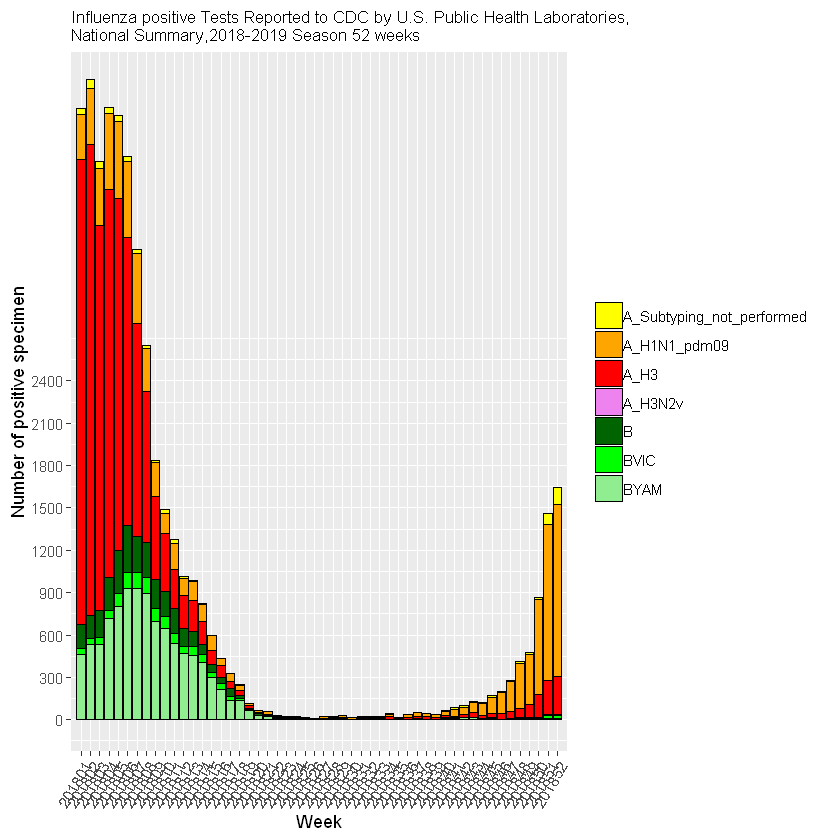

In [5]:
# The positive tested graph (Part2: Problem 2) is plotted again for a different data now. 
#The data is retrieved for the entire 2018 i.e. for 52 weeks and the graph is plotted again.

flu52Week <- read.csv(file.choose())

flu52Week$WeekData<-as.numeric(as.character(flu52Week$WEEK))
flu52Week$WeekData <- seq.int(nrow(flu52Week))
variables <-flu52Week[,c('A_Subtyping_not_performed','A_H1N1_pdm09','A_H3','A_H3N2v','B','BVIC','BYAM','WeekData')]
require(reshape)
variables3 <- melt(variables, id.var='WeekData')


library(ggthemes)
library(ggplot2)
ggplot(variables3, aes(x = WeekData, y = value,fill=variable)) +
  geom_bar(stat = "identity",color="black")+
  scale_x_discrete(limit = flu52Week$WeekData,labels=c("1" = "201801","2" = "201802","3" = "201803",
                                                        "4"="201804","5"="201805","6"="201806",
                                                        "7"="201807", "8"="201808","9" ="201809", "10" ="201810",
                                                        "11"="201811", "12"="201812","13"="201813",
                                                        "14"="201814", "15"="201815","16"="201816",
                                                        "17"="201817", "18"="201818","19"="201819","20"="201820","21"="201821",
                                                        "22"=	"201822",
                                                        "23"=	"201823",
                                                        "24"=	"201824",
                                                        "25"=	"201825",
                                                        "26"=	"201826",
                                                        "27"=	"201827",
                                                        "28"=	"201828",
                                                        "29"=	"201829",
                                                        "30"=	"201830",
                                                        "31"=	"201831",
                                                        "32"=	"201832",
                                                        "33"=	"201833",
                                                        "34"=	"201834",
                                                        "35"=	"201835",
                                                        "36"=	"201836",
                                                        "37"=	"201837",
                                                        "38"=	"201838",
                                                        "39"=	"201839",
                                                        "40"=	"201840",
                                                        "41"=	"201841",
                                                        "42"=	"201842",
                                                        "43"=	"201843",
                                                        "44"=	"201844",
                                                        "45"=	"201845",
                                                        "46"=	"201846",
                                                        "47"=	"201847",
                                                        "48"=	"201848",
                                                        "49"=	"201849",
                                                        "50"=	"201850",
                                                        "51"=	"201851",
                                                        "52"=	"201852"))+
  scale_fill_manual(values = c("yellow","orange","red","violet","darkgreen","green","lightgreen"),aesthetics = "fill")+                     
  theme(axis.text.x = element_text(angle = 60, hjust = 1))+
  theme(legend.title=element_blank())+
  xlab("Week")+
  ylab("Number of positive specimen")+
  coord_cartesian(ylim=c(0,4500))+
  scale_y_continuous(breaks=seq(0,2400,300))+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Public Health Laboratories,\nNational Summary,2018-2019 Season 52 weeks")+
  theme(plot.title = element_text(size=10))

# PART 2:  Problem 1- Influenza National Summary ( Plot for New York State for 52 weeks )

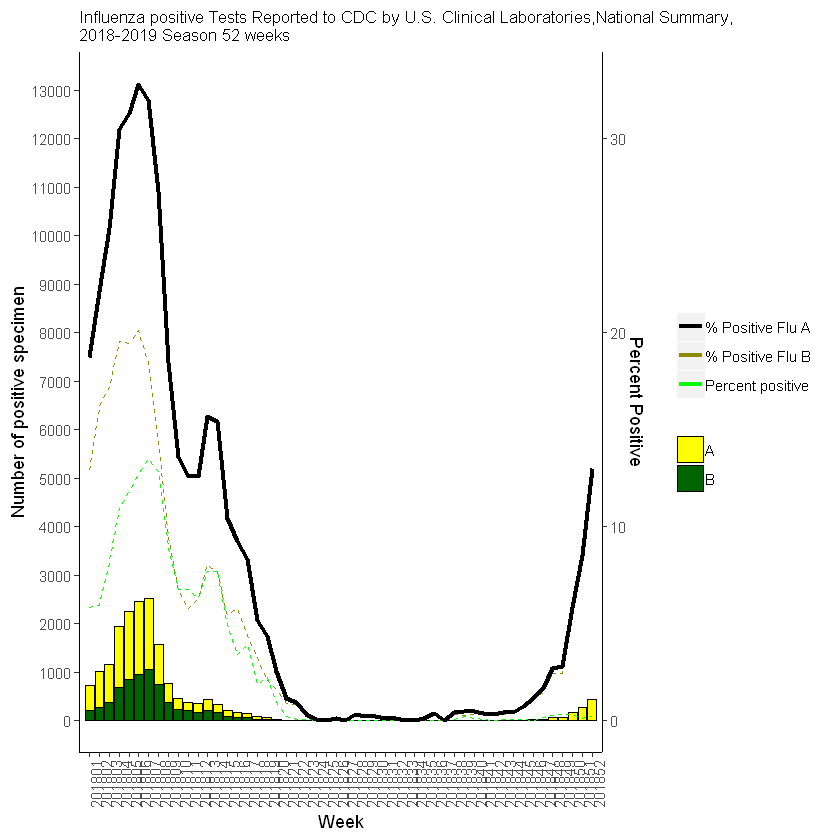

In [25]:
flu2Newyork52 <- read.csv(file.choose())

flu2Newyork52$WeekData<-as.numeric(as.character(flu2Newyork52$Week))


flu2Newyork52$WeekData <- seq.int(nrow(flu2Newyork52))


variables <-flu2Newyork52[,c('A','B','WeekData')]




require(reshape)

variables2 <- melt(variables, id.var='WeekData')

variables3 <-flu2Newyork52[,c('Percent_Positive_A','WeekData')]


variables4 <- melt(variables3, id.var='WeekData')

variables5 <-flu2Newyork52[,c('Percent_Positive_B','WeekData')]
variables6 <- melt(variables5, id.var='WeekData')


variables7 <-flu2Newyork52[,c('PERCENT_POSITIVE','WeekData')]
variables8 <- melt(variables7, id.var='WeekData')



# Install 
library(ggthemes)
library(ggplot2)
ggplot()+
  geom_bar(stat="identity",colour="black",data=variables2, aes(x = WeekData, y = value, fill=variable))+
  scale_fill_manual(values = c("yellow","darkgreen"),aesthetics = "fill")+
  
  geom_line(data = variables4, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables6, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables8, aes(x=WeekData, y = value/0.0025,color = variable),linetype="solid",size=1.25)+
  
  scale_color_manual(name="a",values =c("black","yellow4","green"),labels=c("% Positive Flu A","% Positive Flu B","Percent positive"),aesthetics = "color")+
  
  scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive"),breaks=seq(0,15000,1000))+
  scale_x_discrete(limit = flu2Newyork52$WeekData,labels=c("1" = "201801","2" = "201802","3" = "201803",
                                                        "4"="201804","5"="201805","6"="201806",
                                                        "7"="201807", "8"="201808","9" ="201809", "10" ="201810",
                                                        "11"="201811", "12"="201812","13"="201813",
                                                        "14"="201814", "15"="201815","16"="201816",
                                                        "17"="201817", "18"="201818","19"="201819","20"="201820","21"="201821",
                                                        "22"=	"201822",
                                                        "23"=	"201823",
                                                        "24"=	"201824",
                                                        "25"=	"201825",
                                                        "26"=	"201826",
                                                        "27"=	"201827",
                                                        "28"=	"201828",
                                                        "29"=	"201829",
                                                        "30"=	"201830",
                                                        "31"=	"201831",
                                                        "32"=	"201832",
                                                        "33"=	"201833",
                                                        "34"=	"201834",
                                                        "35"=	"201835",
                                                        "36"=	"201836",
                                                        "37"=	"201837",
                                                        "38"=	"201838",
                                                        "39"=	"201839",
                                                        "40"=	"201840",
                                                        "41"=	"201841",
                                                        "42"=	"201842",
                                                        "43"=	"201843",
                                                        "44"=	"201844",
                                                        "45"=	"201845",
                                                        "46"=	"201846",
                                                        "47"=	"201847",
                                                        "48"=	"201848",
                                                        "49"=	"201849",
                                                        "50"=	"201850",
                                                        "51"=	"201851",
                                                        "52"=	"201852"))+
  
  
  theme(axis.text.x = element_text(angle = 90, hjust = 1),panel.background = element_blank(),axis.line = element_line(colour = "black"),legend.title=element_blank())+
  xlab("Week")+
  ylab("Number of positive specimen")+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Clinical Laboratories,National Summary,\n2018-2019 Season 52 weeks")+
  
  theme(plot.title = element_text(size=10))


# PART 2: Problem 7- Heat Map

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


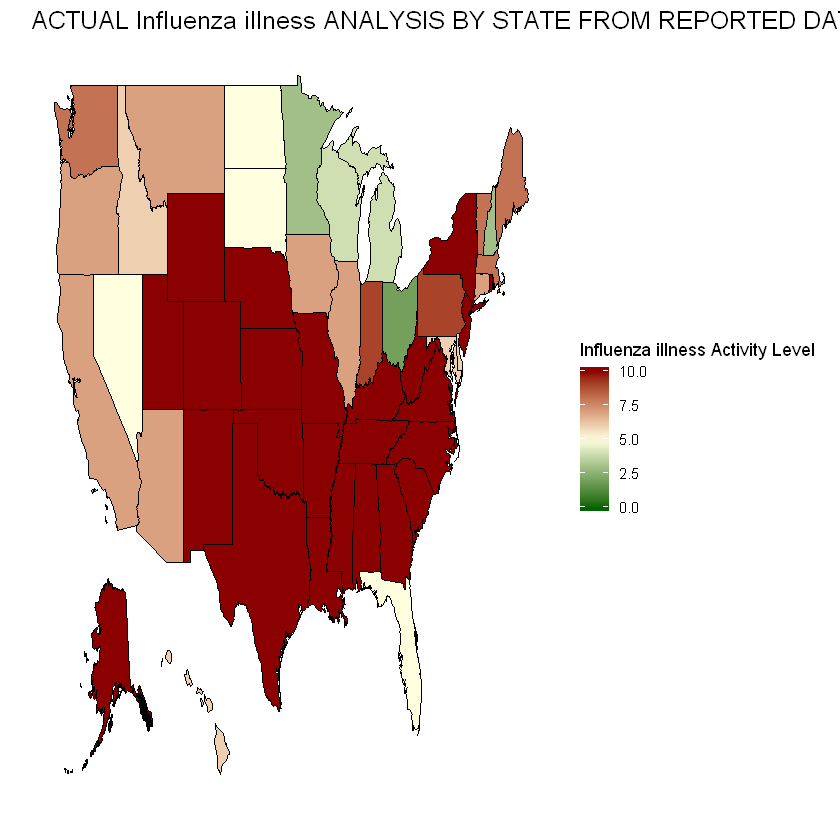

In [30]:
#devtools::install_github("wmurphyrd/fiftystater")

library(ggplot2)
library(fiftystater)
heatmap_data<-read.csv(file.choose())
heatmap_data$level<-as.integer(gsub("[^0-9\\.]", "", heatmap_data$ACTIVITY.LEVEL))
Influenza_illness <- data.frame(state = tolower(heatmap_data$STATENAME), heatmap_data$level)
library(ggmap)
# map_id creates the aesthetic mapping to the state name column in your data
ggplot(Influenza_illness, aes(map_id = state)) + 
  # map points to the fifty_states shape data
  #fifty_states data object makes 50-state choropleth thematic maps in ggplot2 by including Alaska and Hawaii as insets
  
  geom_map(aes(fill = heatmap_data$level),color="black", size=0.2, map = fifty_states) + 
  scale_fill_manual(name="Influenza_illness Activity Level",
                    breaks=c("10","7.5","5.0","2.5","0.0"),
                    labels=c("High", "Moderate", "Low","Minimal","Insufficient Data"),aesthetics = "fill") +
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+
  scale_fill_gradient2(name="Influenza illness Activity Level",
                       low="darkgreen", mid="lightyellow", high="darkred", 
                       midpoint=5, limits=range(heatmap_data$level))+
  ggtitle("ACTUAL Influenza illness ANALYSIS BY STATE FROM REPORTED DATA")+
  theme(plot.title = element_text(size=15))

